# Projct Title: Genetic Disorder Data Analysis & Model Comparison

# Objective:

The objective of this assignment is to analyze a **Genetic Disorder Dataset**, clean and preprocess the data, and compare the performance of three machine learning models: **Support Vector Machine (SVM)**, **Random Forest**, **and Decision Tree** to determine the best model fit for the dataset.

**Use Statuts Column as the dependent variable(y)**

# Instructions

# 1.Data Importing & Inspection

# 2.Data Cleaning:

**Hint**

a.	Rename the column names to remove all spaces and special characters.

**example**

-	Rename "Autopsy shows birth defect (if applicable)" to "Autopsy_shows_birth_defect".

-	Rename "H/O serious maternal illness" to "HO_serious_maternal_illness".

-	Rename "H/O radiation exposure (x-ray)" to "HO_radiation_exposure", etc.


b.	Drop all irrelevant columns.

c.	 check the unique keys in each column to identify and remove irrelevant values.

# 3. Exploratory Data Analysis (EDA)
   
●	Perform **univariate analysis** on key features (e.g., Barchart, histograms, boxplots).

●	Conduct **bivariate analysis** (e.g., correlation heatmap, scatterplots).

●	Perform **multivariate analysis** (e.g., PCA if applicable).

●	Identify patterns or trends from the dataset.


# 4. Data Preprocessing:

# 5. Model Training & Evaluation
   
●	Train the following model

  **○	Support Vector Machine (SVM)**

  **○	Random Forest**

  **○	Decision Tree**

●	Determine the best model based on performance metrics and justify your choice.


# 6. Conclusion & Recommendations 

●	Summarize key findings from the analysis.

●	Justify the best-performing model based on the results.

●	Provide recommendations for improving model performance.

●	Discuss any limitations of the dataset or models.


# Importing the libries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the dataset

In [2]:
df = pd .read_csv("C:/Users/Oceande/Genetic_disorder.csv")
df.head()

,Patient Id,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Patient First Name,Family Name,Father's name,...,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
0,PID0x8ce3,11.0,No,No,Yes,No,5.209058,Willie,Camacho,Tr,...,Multiple,6.669552,slightly abnormal,1.0,1.0,1.0,0.0,1.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
1,PID0x8660,4.0,No,Yes,Yes,Yes,4.752272,John,Sandoval,Gregori,...,Multiple,6.397702,abnormal,0.0,0.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes
2,PID0x7678,6.0,Yes,No,Yes,No,4.620420,Ruth,Homza,Cesareo,...,Multiple,3.000000,slightly abnormal,1.0,0.0,1.0,0.0,1.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
3,PID0x952d,10.0,Yes,Yes,Yes,No,4.751452,James,Whipple,Dvon,...,Singular,9.382407,abnormal,1.0,1.0,0.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Mitochondrial myopathy
4,PID0x6d89,6.0,No,Yes,Yes,Yes,4.876896,Miguel,Canada,Zykevious,...,Singular,7.370477,normal,1.0,0.0,0.0,0.0,0.0,Single-gene inheritance diseases,Hemochromatosis


# DATASET DESCRIPTION

1.	Patient Id – A special code given to each patient.
2.	Patient Age – How old the patient is.
3.	Genes in mother's side – Did the patient get a certain gene from their mom? (Yes/No)
4.	Inherited from father – Did the patient get a certain gene from their dad? (Yes/No)
5.	Maternal gene – Extra info about genes from the mother (Yes/No).
6.	Paternal gene – Extra info about genes from the father (Yes/No).
7.	Blood cell count (mcL) – The number of blood cells in a tiny drop of blood.
8.	Patient First Name – The first name of the patient.
9.	Family Name – The last name of the patient.
10.	Father's name – The name of the patient’s father.
11.	Mother's age – How old the mother is.
12.	Father's age – How old the father is.
13.	Institute Name – The name of the hospital or lab where the patient was treated.
14.	Location of Institute – The place where the hospital or lab is.
15.	Status – The condition or progress of the patient 
16.	Respiratory Rate (breaths/min) – How many breaths the patient takes in a minute.
17.	Heart Rate (rates/min) – How many times the heart beats in a minute.
18.	Test 1 – Result of the first medical test.
19.	Test 2 – Result of the second medical test.
20.	Test 3 – Result of the third medical test.
21.	Test 4 – Result of the fourth medical test.
22.	Test 5 – Result of the fifth medical test.
23.	Parental consent – Did the parents give permission for medical tests? (Yes/No)
24.	Follow-up – Did the patient return for more checkups?
25.	Gender – Whether the patient is male or female.
26.	Birth asphyxia – Did the baby have trouble breathing at birth? (Yes/No)
27.	Autopsy shows birth defect (if applicable) – If the patient passed away, did they have birth defects?
28.	Place of birth – Where the patient was born (e.g., hospital, home).
29.	Folic acid details (peri-conceptional) – Did the mother take folic acid before/during pregnancy?
30.	H/O serious maternal illness – Did the mother have any serious illness? (H/O = history of)
31.	H/O radiation exposure (x-ray) – Was the mother exposed to X-rays during pregnancy?
32.	H/O substance abuse – Did the mother use harmful substances during pregnancy?
33.	Assisted conception IVF/ART – Was the baby conceived using medical help (like IVF)?
34.	History of anomalies in previous pregnancies – Did the mother have any pregnancy problems before?
35.	No. of previous abortion – How many times the mother had a miscarriage or abortion before.
36.	Birth defects – Does the patient have any birth defects?
37.	White Blood cell count (thousand per microliter) – The number of white blood cells, which fight infections.
38.	Blood test result – The outcome of a blood test (e.g., normal, inconclusive).
39.	Symptom 1 – A sign of illness (1 = present, 0 = not present).
40.	Symptom 2 – Another sign of illness.
41.	Symptom 3 – Another sign of illness.
42.	Symptom 4 – Another sign of illness.
43.	Symptom 5 – Another sign of illness.
44.	Genetic Disorder – The type of disorder the patient has due to their genes.
45.	Disorder Subclass – A more specific name for the disorder.


# Summarizing the numerical values

In [3]:
df.describe()

,Patient Age,Blood cell count (mcL),Mother's age,Father's age,Test 1,Test 2,Test 3,Test 4,Test 5,No. of previous abortion,White Blood cell count (thousand per microliter),Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5
count,5585.000000,5585.000000,5585.000000,5585.000000,5585.0,5585.0,5585.0,5585.0,5585.0,5585.000000,5585.000000,5585.000000,5585.000000,5585.000000,5585.000000,5585.000000
mean,6.916562,4.901093,34.711549,41.989794,0.0,0.0,0.0,1.0,0.0,2.004476,7.413868,0.586750,0.551477,0.543599,0.496509,0.469651
std,4.354565,0.199098,9.826889,12.968833,0.0,0.0,0.0,0.0,0.0,1.409831,2.648672,0.492461,0.497388,0.498140,0.500033,0.499123
min,0.000000,4.146230,18.000000,20.000000,0.0,0.0,0.0,1.0,0.0,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,4.768235,26.000000,31.000000,0.0,0.0,0.0,1.0,0.0,1.000000,5.362171,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.000000,4.899601,35.000000,42.000000,0.0,0.0,0.0,1.0,0.0,2.000000,7.356993,1.000000,1.000000,1.000000,0.000000,0.000000
75%,11.000000,5.036165,43.000000,53.000000,0.0,0.0,0.0,1.0,0.0,3.000000,9.449252,1.000000,1.000000,1.000000,1.000000,1.000000
max,14.000000,5.609829,51.000000,64.000000,0.0,0.0,0.0,1.0,0.0,4.000000,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Summarizing the categorical values

In [4]:
df.describe(include="object")

,Patient Id,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Patient First Name,Family Name,Father's name,Institute Name,Location of Institute,...,Folic acid details (peri-conceptional),H/O serious maternal illness,H/O radiation exposure (x-ray),H/O substance abuse,Assisted conception IVF/ART,History of anomalies in previous pregnancies,Birth defects,Blood test result,Genetic Disorder,Disorder Subclass
count,5585,5585,5585,5585,5585,5585,5585,5585,5585,5585,...,5585,5585,5585,5585,5585,5585,5585,5585,5585,5585
unique,5585,2,2,2,2,1348,3463,5166,27,26,...,2,2,4,4,2,2,2,4,3,9
top,PID0x8ce3,Yes,No,Yes,No,James,Smith,Sager,Not applicable,-,...,Yes,No,No,-,Yes,Yes,Singular,normal,Mitochondrial genetic inheritance disorders,Leigh syndrome
freq,1,3351,3355,3135,3159,113,74,3,2796,2796,...,2835,2849,1443,1433,2852,2847,2804,1452,2867,1428


# Checking for how many rows and columns that are in the dataset

In [5]:
df.shape

(5585, 45)

# Checking for a brief overview of the dataset

In [6]:
df.info

<bound method DataFrame.info of      Patient Id  Patient Age Genes in mother's side Inherited from father  \
0     PID0x8ce3         11.0                     No                    No   
1     PID0x8660          4.0                     No                   Yes   
2     PID0x7678          6.0                    Yes                    No   
3     PID0x952d         10.0                    Yes                   Yes   
4     PID0x6d89          6.0                     No                   Yes   
...         ...          ...                    ...                   ...   
5580  PID0x86a8          7.0                     No                    No   
5581  PID0x7168         12.0                    Yes                    No   
5582  PID0x78f0          6.0                     No                   Yes   
5583  PID0x7f83         13.0                     No                   Yes   
5584  PID0x9aad          4.0                    Yes                    No   

     Maternal gene Paternal gene  Blood cel

# Checking for the columns name

In [7]:
df.columns

Index(['Patient Id', 'Patient Age', 'Genes in mother's side',
       'Inherited from father', 'Maternal gene', 'Paternal gene',
       'Blood cell count (mcL)', 'Patient First Name', 'Family Name',
       'Father's name', 'Mother's age', 'Father's age', 'Institute Name',
       'Location of Institute', 'Status', 'Respiratory Rate (breaths/min)',
       'Heart Rate (rates/min', 'Test 1', 'Test 2', 'Test 3', 'Test 4',
       'Test 5', 'Parental consent', 'Follow-up', 'Gender', 'Birth asphyxia',
       'Autopsy shows birth defect (if applicable)', 'Place of birth',
       'Folic acid details (peri-conceptional)',
       'H/O serious maternal illness', 'H/O radiation exposure (x-ray)',
       'H/O substance abuse', 'Assisted conception IVF/ART',
       'History of anomalies in previous pregnancies',
       'No. of previous abortion', 'Birth defects',
       'White Blood cell count (thousand per microliter)', 'Blood test result',
       'Symptom 1', 'Symptom 2', 'Symptom 3', 'Symptom 4', 'S

# Handling the Uneeded Columns

In [8]:
df.drop(["Patient Id", "Patient First Name", "Family Name", "Father's name", "Institute Name", "Location of Institute"], axis=1, inplace=True)

In [9]:
df.columns

Index(['Patient Age', 'Genes in mother's side', 'Inherited from father',
       'Maternal gene', 'Paternal gene', 'Blood cell count (mcL)',
       'Mother's age', 'Father's age', 'Status',
       'Respiratory Rate (breaths/min)', 'Heart Rate (rates/min', 'Test 1',
       'Test 2', 'Test 3', 'Test 4', 'Test 5', 'Parental consent', 'Follow-up',
       'Gender', 'Birth asphyxia',
       'Autopsy shows birth defect (if applicable)', 'Place of birth',
       'Folic acid details (peri-conceptional)',
       'H/O serious maternal illness', 'H/O radiation exposure (x-ray)',
       'H/O substance abuse', 'Assisted conception IVF/ART',
       'History of anomalies in previous pregnancies',
       'No. of previous abortion', 'Birth defects',
       'White Blood cell count (thousand per microliter)', 'Blood test result',
       'Symptom 1', 'Symptom 2', 'Symptom 3', 'Symptom 4', 'Symptom 5',
       'Genetic Disorder', 'Disorder Subclass'],
      dtype='object')

In [10]:
df.shape

(5585, 39)

# Editing the column names

In [11]:
df.rename(columns = {"Patient Age": "Patient_Age", "Genes in mother's side": "Genes_in_mother's_side", "Inherited from father": "Inherited_from_father",
                   "Maternal gene": "Maternal_gene", "Paternal gene": "Paternal_gene", "Blood cell count (mcL)": "Blood_cell_count",
                   "Mother's age": "Mother's_age", "Father's age": "Father's_age", "Status": "Status", "Respiratory Rate (breaths/min)": 
                   "Respiratory_Rate", "Heart Rate (rates/min": "Heart_Rate", "Test 1": "Test_1", "Test 2": "Test_2", "Test 3": "Test_3", 
                   "Test 4": "Test_4", "Test 5": "Test_5", "Parental consent": "Parental_consent", "Follow-up": "Follow_up", "Gender": "Gender",
                   "Birth asphyxia": "Birth_asphyxia", "Autopsy shows birth defect (if applicable)": "Autopsy_shows_birth_defect", 
                   "Place of birth": "Place_of_birth", "Folic acid details (peri-conceptional)": "Folic_acid_details", "H/O serious maternal illness":
                   "HO_serious_maternal_illness", "H/O radiation exposure (x-ray)": "HO_radiation_exposure", "H/O substance abuse": 
                   "HO_substance_abuse", "Assisted conception IVF/ART": "Assisted_conception_IVF_ART", "History of anomalies in previous pregnancies": 
                   "History_of_anomalies_in_previous_pregnancies", "No. of previous abortion": "No_of_previous_abortion", "Birth defects": 
                   "Birth_defects", "White Blood cell count (thousand per microliter)": "White_Blood_cell_count", "Blood test result": 
                   "Blood_test_result", "Symptom 1": "Symptom_1", "Symptom 2": "Symptom_2", "Symptom 3": "Symptom_3", "Symptom 4": "Symptom_4", 
                   "Symptom 5": "Symptom_5", "Genetic Disorder": "Genetic_Disorder", "Disorder Subclass": "Disorder_Subclass"}, inplace = True)

In [12]:
df.columns

Index(['Patient_Age', 'Genes_in_mother's_side', 'Inherited_from_father',
       'Maternal_gene', 'Paternal_gene', 'Blood_cell_count', 'Mother's_age',
       'Father's_age', 'Status', 'Respiratory_Rate', 'Heart_Rate', 'Test_1',
       'Test_2', 'Test_3', 'Test_4', 'Test_5', 'Parental_consent', 'Follow_up',
       'Gender', 'Birth_asphyxia', 'Autopsy_shows_birth_defect',
       'Place_of_birth', 'Folic_acid_details', 'HO_serious_maternal_illness',
       'HO_radiation_exposure', 'HO_substance_abuse',
       'Assisted_conception_IVF_ART',
       'History_of_anomalies_in_previous_pregnancies',
       'No_of_previous_abortion', 'Birth_defects', 'White_Blood_cell_count',
       'Blood_test_result', 'Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4',
       'Symptom_5', 'Genetic_Disorder', 'Disorder_Subclass'],
      dtype='object')

In [13]:
df.head()

,Patient_Age,Genes_in_mother's_side,Inherited_from_father,Maternal_gene,Paternal_gene,Blood_cell_count,Mother's_age,Father's_age,Status,Respiratory_Rate,...,Birth_defects,White_Blood_cell_count,Blood_test_result,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Genetic_Disorder,Disorder_Subclass
0,11.0,No,No,Yes,No,5.209058,45.0,44.0,Alive,Tachypnea,...,Multiple,6.669552,slightly abnormal,1.0,1.0,1.0,0.0,1.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
1,4.0,No,Yes,Yes,Yes,4.752272,44.0,42.0,Alive,Tachypnea,...,Multiple,6.397702,abnormal,0.0,0.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes
2,6.0,Yes,No,Yes,No,4.620420,41.0,20.0,Alive,Tachypnea,...,Multiple,3.000000,slightly abnormal,1.0,0.0,1.0,0.0,1.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
3,10.0,Yes,Yes,Yes,No,4.751452,40.0,57.0,Deceased,Normal (30-60),...,Singular,9.382407,abnormal,1.0,1.0,0.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Mitochondrial myopathy
4,6.0,No,Yes,Yes,Yes,4.876896,36.0,48.0,Deceased,Tachypnea,...,Singular,7.370477,normal,1.0,0.0,0.0,0.0,0.0,Single-gene inheritance diseases,Hemochromatosis


# Checking for the data types

In [14]:
df.dtypes

Patient_Age                                     float64
Genes_in_mother's_side                           object
Inherited_from_father                            object
Maternal_gene                                    object
Paternal_gene                                    object
Blood_cell_count                                float64
Mother's_age                                    float64
Father's_age                                    float64
Status                                           object
Respiratory_Rate                                 object
Heart_Rate                                       object
Test_1                                          float64
Test_2                                          float64
Test_3                                          float64
Test_4                                          float64
Test_5                                          float64
Parental_consent                                 object
Follow_up                                       

# Checking for unique/inconsistent values

In [15]:
df["Genes_in_mother's_side"].unique()

array(['No', 'Yes'], dtype=object)

In [16]:
df["Inherited_from_father"].unique()

array(['No', 'Yes'], dtype=object)

In [17]:
df["Maternal_gene"].unique()

array(['Yes', 'No'], dtype=object)

In [18]:
df["Paternal_gene"].unique()

array(['No', 'Yes'], dtype=object)

In [19]:
df["Status"].unique()

array(['Alive', 'Deceased'], dtype=object)

In [20]:
df["Respiratory_Rate"].unique()

array(['Tachypnea', 'Normal (30-60)'], dtype=object)

In [21]:
df["Heart_Rate"].unique()

array(['Tachycardia', 'Normal'], dtype=object)

In [22]:
df["Parental_consent"].unique()

array(['Yes'], dtype=object)

In [23]:
df["Follow_up"].unique()

array(['Low', 'High'], dtype=object)

In [24]:
df["Gender"].unique()

array(['Male', 'Ambiguous', 'Female'], dtype=object)

In [25]:
df["Autopsy_shows_birth_defect"].unique()

array(['Not applicable', 'Yes', 'No'], dtype=object)

In [26]:
df["Birth_asphyxia"].unique()

array(['Yes', 'No', 'Not available', 'No record'], dtype=object)

In [27]:
df["Place_of_birth"].unique()

array(['Institute', 'Home'], dtype=object)

In [28]:
df["Folic_acid_details"].unique()

array(['Yes', 'No'], dtype=object)

In [29]:
df["HO_serious_maternal_illness"].unique()

array(['Yes', 'No'], dtype=object)

In [30]:
df["HO_radiation_exposure"].unique()

array(['No', 'Yes', 'Not applicable', '-'], dtype=object)

In [31]:
df["HO_substance_abuse"].unique()

array(['No', '-', 'Yes', 'Not applicable'], dtype=object)

In [32]:
df["Assisted_conception_IVF_ART"].unique()

array(['No', 'Yes'], dtype=object)

In [33]:
df["History_of_anomalies_in_previous_pregnancies"].unique()

array(['Yes', 'No'], dtype=object)

In [34]:
df["Birth_defects"].unique()

array(['Multiple', 'Singular'], dtype=object)

In [35]:
df["Blood_test_result"].unique()

array(['slightly abnormal', 'abnormal', 'normal', 'inconclusive'],
      dtype=object)

In [36]:
df["Genetic_Disorder"].unique()

array(['Mitochondrial genetic inheritance disorders',
       'Multifactorial genetic inheritance disorders',
       'Single-gene inheritance diseases'], dtype=object)

In [37]:
df["Disorder_Subclass"].unique()

array(['Leigh syndrome', 'Diabetes', 'Mitochondrial myopathy',
       'Hemochromatosis', 'Cystic fibrosis', 'Tay-Sachs', "Alzheimer's",
       "Leber's hereditary optic neuropathy", 'Cancer'], dtype=object)

# Editting the Normal (30-60) in Respiratory_Rate

In [38]:
df["Respiratory_Rate"] = df["Respiratory_Rate"].str.replace(r"\s*\(30-60\)", "", regex=True)

In [39]:
print(df["Respiratory_Rate"].unique())

['Tachypnea' 'Normal']


# Checking for missing values

In [40]:
df.isnull().sum()

Patient_Age                                     0
Genes_in_mother's_side                          0
Inherited_from_father                           0
Maternal_gene                                   0
Paternal_gene                                   0
Blood_cell_count                                0
Mother's_age                                    0
Father's_age                                    0
Status                                          0
Respiratory_Rate                                0
Heart_Rate                                      0
Test_1                                          0
Test_2                                          0
Test_3                                          0
Test_4                                          0
Test_5                                          0
Parental_consent                                0
Follow_up                                       0
Gender                                          0
Birth_asphyxia                                  0


# Checking for duplicate

In [41]:
df.duplicated().sum()

0

# Data cleaning

In [42]:
df.dropna(inplace=True)

In [43]:
df.shape

(5585, 39)

In [45]:
df =  df[df.Gender != "Ambiguous"]

In [46]:
df.shape

(3753, 39)

In [47]:
df = df[~df["Birth_asphyxia"].isin(["Not available", "No record"])]

In [48]:
df.shape


(1952, 39)

In [49]:
df =  df[df.Blood_test_result != "inconclusive"]

In [50]:
df.shape

(1499, 39)

In [51]:
print(df["Gender"].unique())
print(df["Birth_asphyxia"].unique())
print(df["Autopsy_shows_birth_defect"].unique())
print(df["Birth_asphyxia"].unique())
print(df["HO_radiation_exposure"].unique())
print(df["HO_substance_abuse"].unique())

['Male' 'Female']
['Yes' 'No']
['Not applicable' 'No' 'Yes']
['Yes' 'No']
['No' 'Yes' 'Not applicable' '-']
['No' '-' 'Not applicable' 'Yes']


# Handling the underscore ('_') from the values in the columns HO_radiation_exposure and HO_substance_abuse.

In [52]:
df["HO_radiation_exposure"] = df["HO_radiation_exposure"].astype(str).replace({"_": "", "-": None})
df["HO_substance_abuse"] = df["HO_substance_abuse"].astype(str).replace({"_": "", "-": None})

In [53]:
print(df["HO_radiation_exposure"].unique())
print(df["HO_substance_abuse"].unique())


['No' 'Yes' 'Not applicable' None]
['No' None 'Not applicable' 'Yes']


# Dropping the None

In [54]:
df.dropna(subset=["HO_radiation_exposure", "HO_substance_abuse", "Blood_test_result"], inplace=True)


In [55]:
print(df["HO_radiation_exposure"].unique())
print(df["HO_substance_abuse"].unique())

['No' 'Not applicable' 'Yes']
['No' 'Not applicable' 'Yes']


In [56]:
df.shape

(836, 39)

# Exploratory Data Analysis(EDA)

## Univariate Analysis



### Categorical Variables

### Genes in mother's side

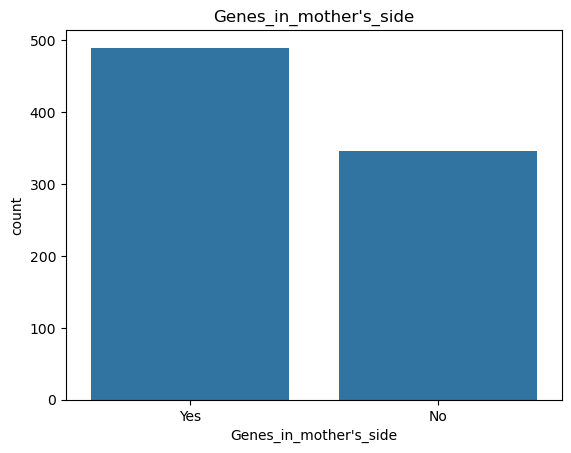

In [57]:
sns.barplot(x = df["Genes_in_mother's_side"].value_counts().index, y = df["Genes_in_mother's_side"].value_counts())
plt.title("Genes_in_mother's_side")
plt.show()

# Inherited from father

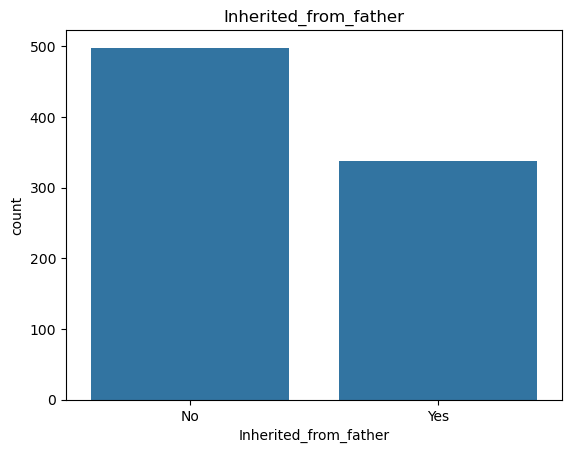

In [58]:
sns.barplot(x = df["Inherited_from_father"].value_counts().index, y = df["Inherited_from_father"].value_counts())
plt.title("Inherited_from_father")
plt.show()

# Maternal gene

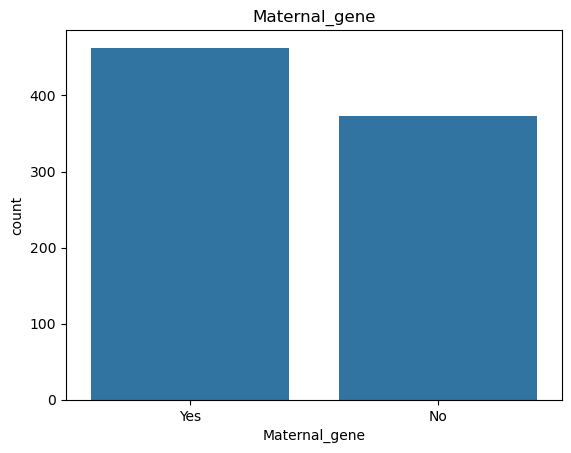

In [59]:
sns.barplot(x = df["Maternal_gene"].value_counts().index, y = df["Maternal_gene"].value_counts())
plt.title("Maternal_gene")
plt.show()

# Paternal gene

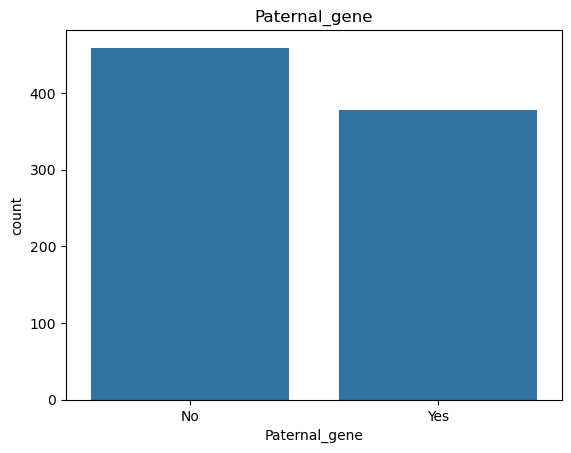

In [60]:
sns.barplot(x = df["Paternal_gene"].value_counts().index, y = df["Paternal_gene"].value_counts())
plt.title("Paternal_gene")
plt.show()

# Status

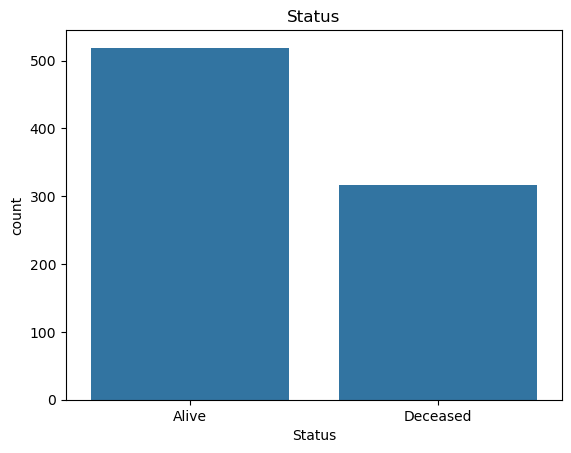

In [61]:
sns.barplot(x = df["Status"].value_counts().index, y = df["Status"].value_counts())
plt.title("Status")
plt.show()

# Respiratory Rate

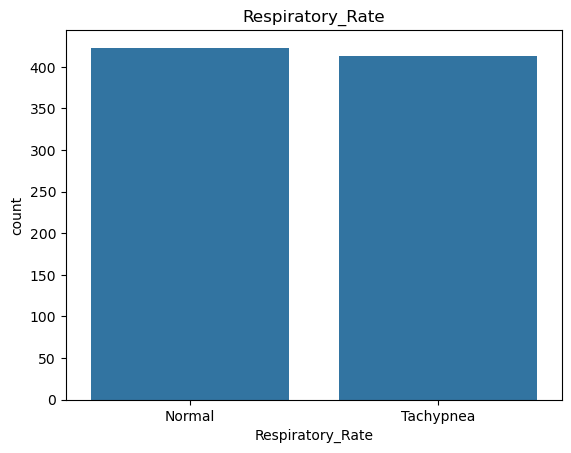

In [62]:
sns.barplot(x = df["Respiratory_Rate"].value_counts().index, y = df["Respiratory_Rate"].value_counts())
plt.title("Respiratory_Rate")
plt.show()

# Heart Rate

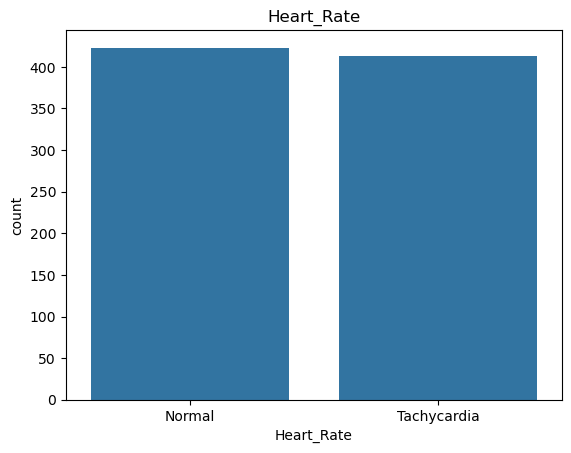

In [63]:
sns.barplot(x = df["Heart_Rate"].value_counts().index, y = df["Heart_Rate"].value_counts())
plt.title("Heart_Rate")
plt.show()

# Parental_consent

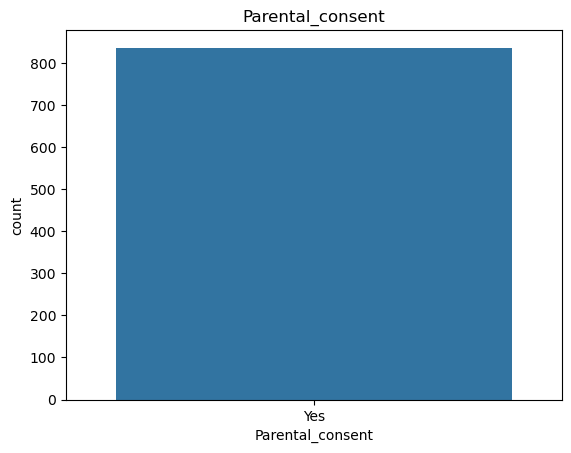

In [64]:
sns.barplot(x = df["Parental_consent"].value_counts().index, y = df["Parental_consent"].value_counts())
plt.title("Parental_consent")
plt.show()

# Follow Up

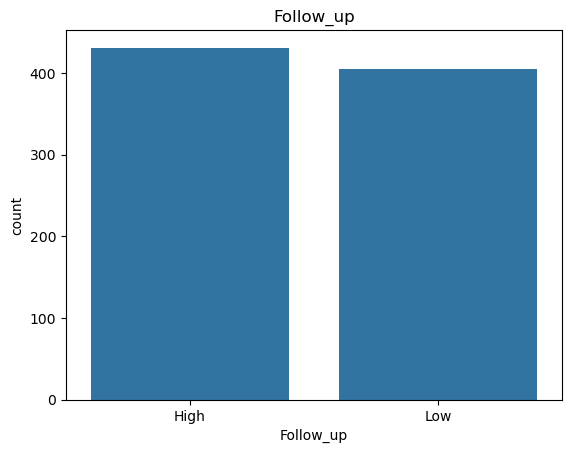

In [65]:
sns.barplot(x = df["Follow_up"].value_counts().index, y = df["Follow_up"].value_counts())
plt.title("Follow_up")
plt.show()

# Gender

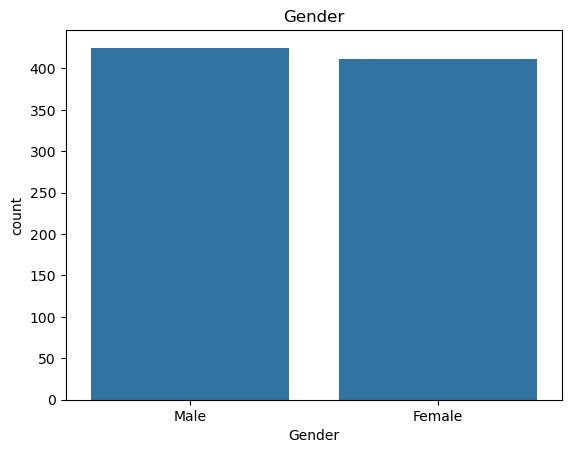

In [66]:
sns.barplot(x = df['Gender'].value_counts().index, y = df['Gender'].value_counts())
plt.title('Gender')
plt.show()

# Birth Asphyxia

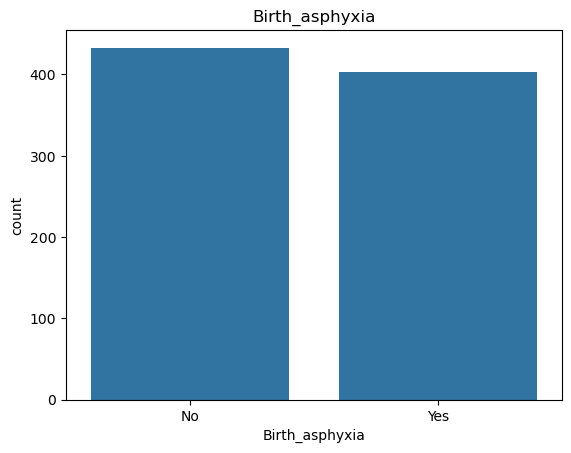

In [67]:
sns.barplot(x = df["Birth_asphyxia"].value_counts().index, y = df["Birth_asphyxia"].value_counts())
plt.title("Birth_asphyxia")
plt.show()

# Autopsy_shows_birth_defect

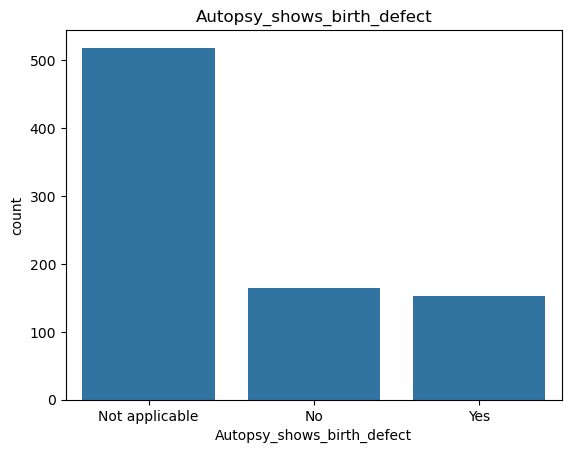

In [68]:
sns.barplot(x = df["Autopsy_shows_birth_defect"].value_counts().index, y = df["Autopsy_shows_birth_defect"].value_counts())
plt.title("Autopsy_shows_birth_defect")
plt.show()

# Place_of_birth

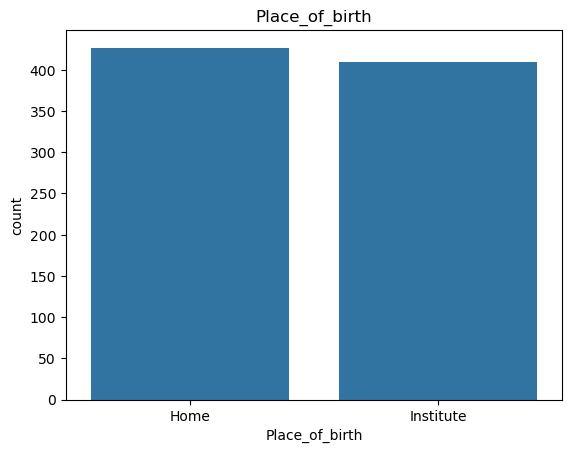

In [69]:
sns.barplot(x = df["Place_of_birth"].value_counts().index, y = df["Place_of_birth"].value_counts())
plt.title("Place_of_birth")
plt.show()

# Folic_acid_details

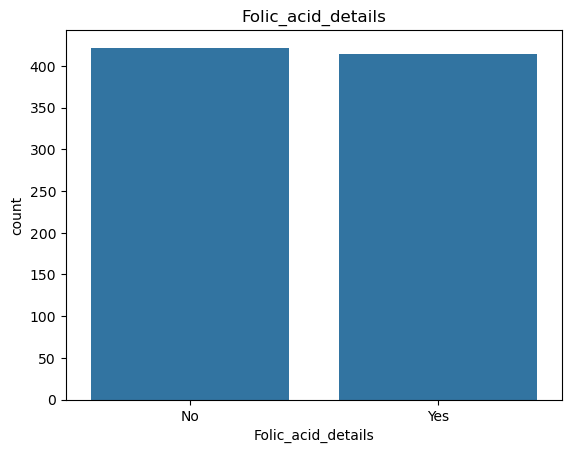

In [70]:
sns.barplot(x = df["Folic_acid_details"].value_counts().index, y = df["Folic_acid_details"].value_counts())
plt.title("Folic_acid_details")
plt.show()

# HO_serious_maternal_illness 

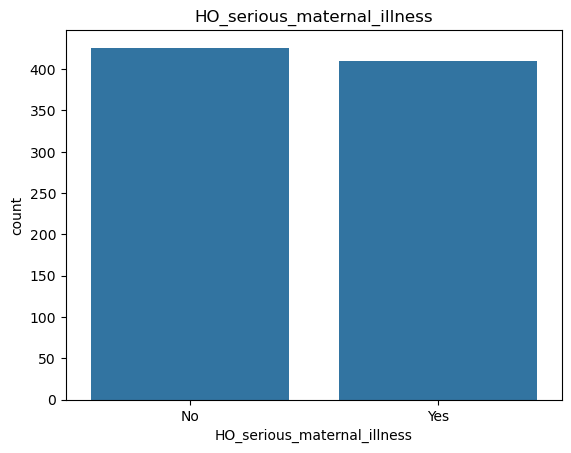

In [71]:
sns.barplot(x = df["HO_serious_maternal_illness"].value_counts().index, 
            y = df["HO_serious_maternal_illness"].value_counts())
plt.title("HO_serious_maternal_illness")
plt.show()



### HO_radiation_exposure

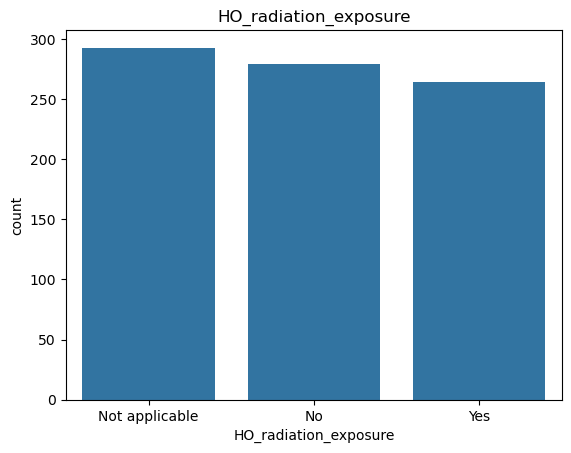

In [72]:
sns.barplot(x = df["HO_radiation_exposure"].value_counts().index, y = df["HO_radiation_exposure"].value_counts())
plt.title("HO_radiation_exposure")
plt.show()

### HO_substance_abuse

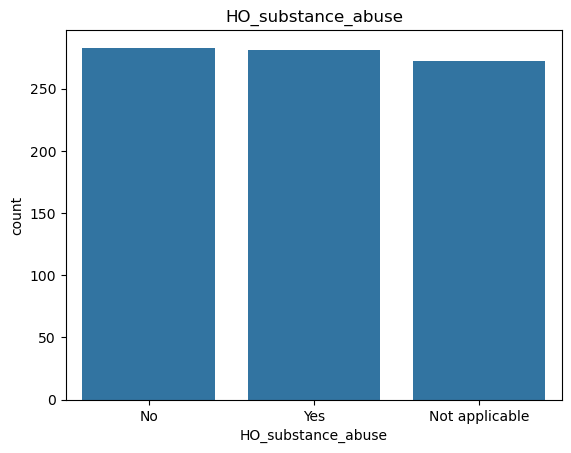

In [73]:
sns.barplot(x = df["HO_substance_abuse"].value_counts().index, y = df["HO_substance_abuse"].value_counts())
plt.title("HO_substance_abuse")
plt.show()

# Assisted_conception_IVF_ART

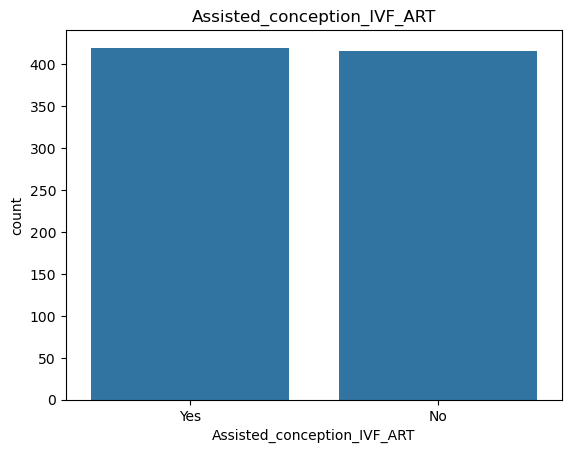

In [74]:
sns.barplot(x = df["Assisted_conception_IVF_ART"].value_counts().index, y = df["Assisted_conception_IVF_ART"].value_counts())
plt.title("Assisted_conception_IVF_ART")
plt.show()

# History_of_anomalies_in_previous_pregnancies

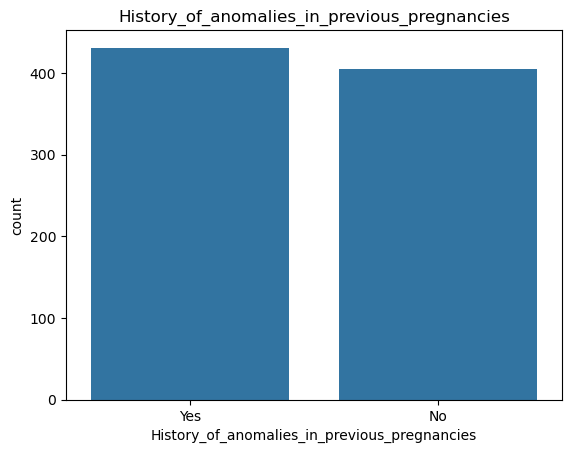

In [75]:
sns.barplot(x = df["History_of_anomalies_in_previous_pregnancies"].value_counts().index, 
            y = df["History_of_anomalies_in_previous_pregnancies"].value_counts())
plt.title("History_of_anomalies_in_previous_pregnancies")
plt.show()

# Birth_defects 

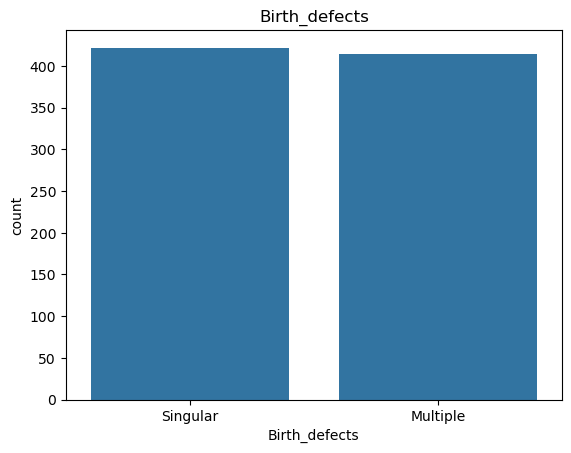

In [76]:
sns.barplot(x = df["Birth_defects"].value_counts().index, y = df["Birth_defects"].value_counts())
plt.title("Birth_defects")
plt.show()

# Blood_test_result

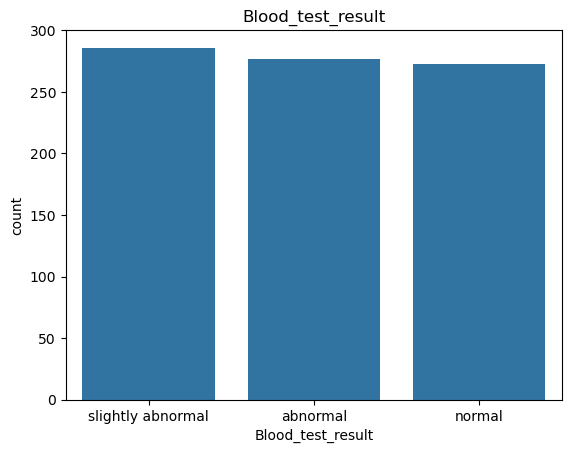

In [77]:
sns.barplot(x = df["Blood_test_result"].value_counts().index, y = df["Blood_test_result"].value_counts())
plt.title("Blood_test_result")
plt.show()

# Genetic_Disorder 

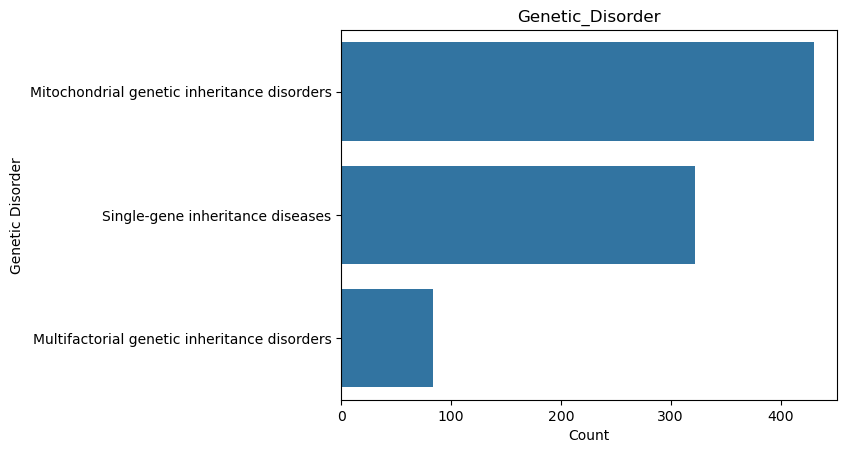

In [78]:
sns.barplot(y = df["Genetic_Disorder"].value_counts().index, 
            x = df["Genetic_Disorder"].value_counts())
plt.title("Genetic_Disorder")
plt.xlabel("Count")
plt.ylabel("Genetic Disorder")
plt.show()

# Numerical Variable

### Patient Age

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

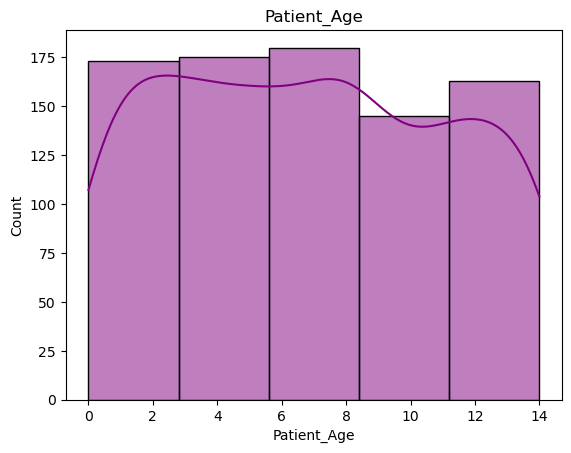

In [80]:
sns.histplot(df["Patient_Age"], bins=5, kde=True, color='purple')
plt.title("Patient_Age")
plt.show()

# Blood cell count

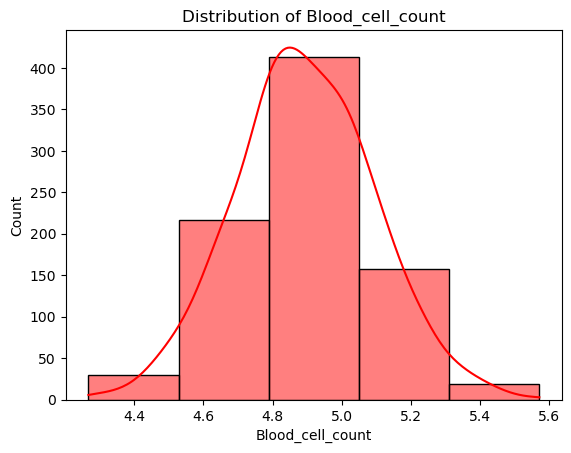

In [81]:
sns.histplot(df["Blood_cell_count"], bins=5, kde=True, color='red')
plt.title("Distribution of Blood_cell_count")
plt.show()

# Mother's_Age

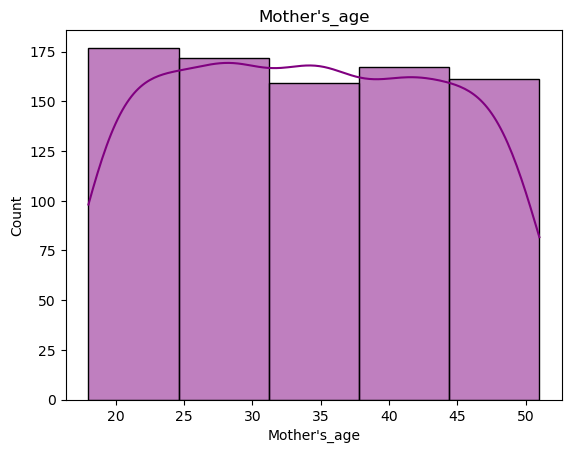

In [82]:
sns.histplot(df["Mother's_age"], bins=5, kde=True, color="purple")
plt.title("Mother's_age")
plt.show()

# Father's_Age

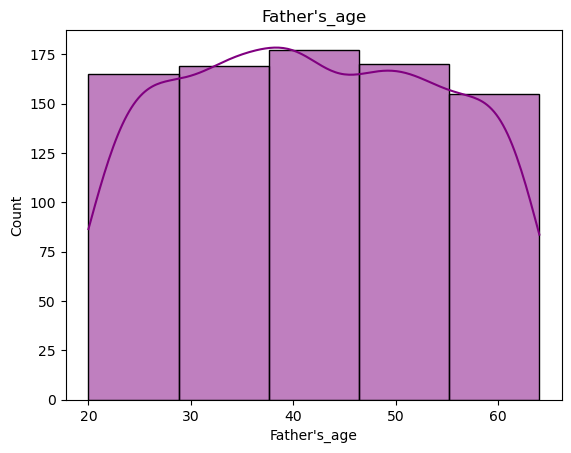

In [83]:
sns.histplot(df["Father's_age"], bins=5, kde=True, color="purple")
plt.title("Father's_age")
plt.show()

# Test_1 

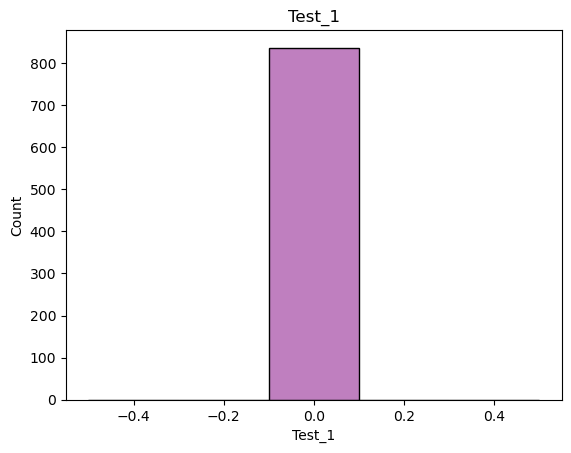

In [84]:
sns.histplot(df["Test_1"], bins=5, kde=True, color='purple')
plt.title("Test_1")
plt.show()

# Test_2

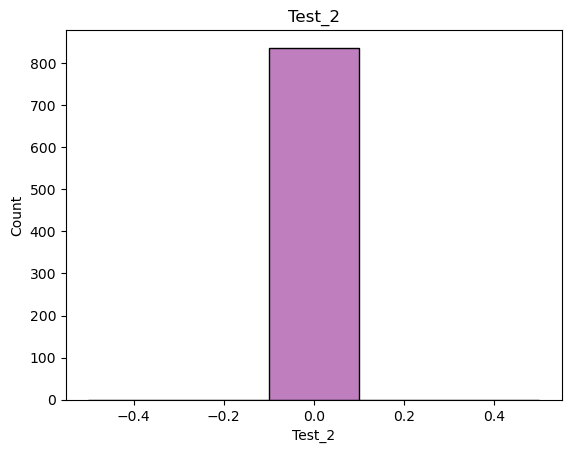

In [85]:
sns.histplot(df["Test_2"], bins=5, kde=True, color='purple')
plt.title("Test_2")
plt.show()

# Test_3

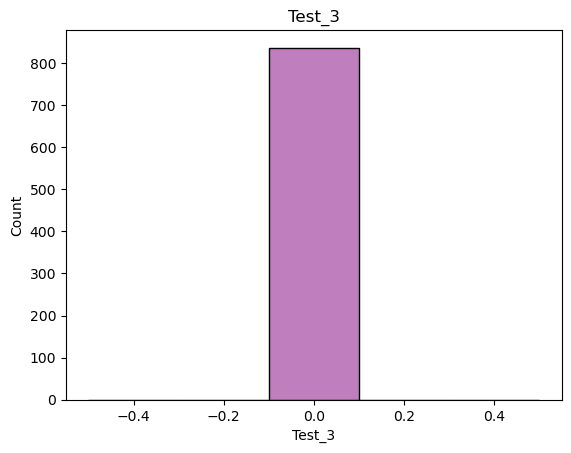

In [86]:
sns.histplot(df["Test_3"], bins=5, kde=True, color='purple')
plt.title("Test_3")
plt.show()

Test_4

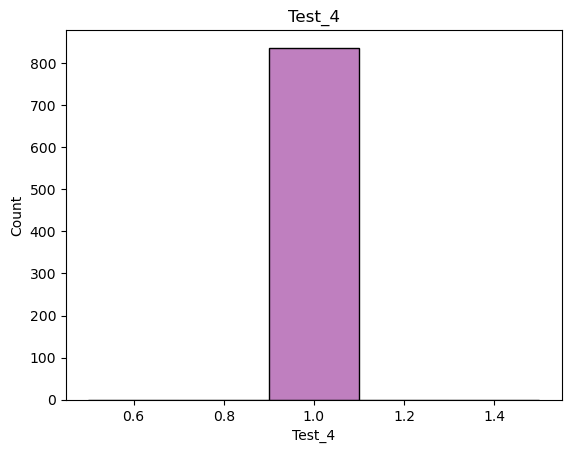

In [87]:
sns.histplot(df["Test_4"], bins=5, kde=True, color='purple')
plt.title("Test_4")
plt.show()

# Test_5

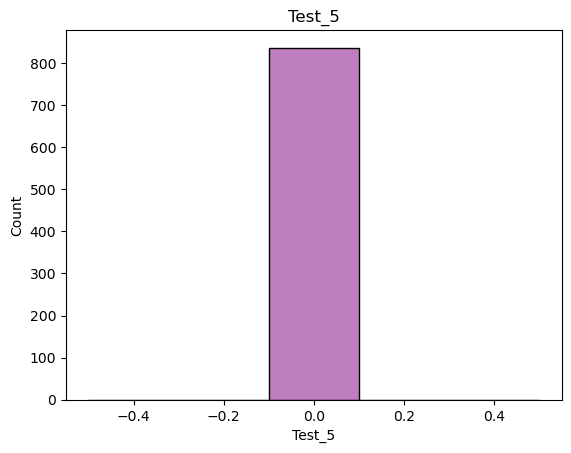

In [88]:
sns.histplot(df["Test_5"], bins=5, kde=True, color='purple')
plt.title("Test_5")
plt.show()

# No of previous abortion 

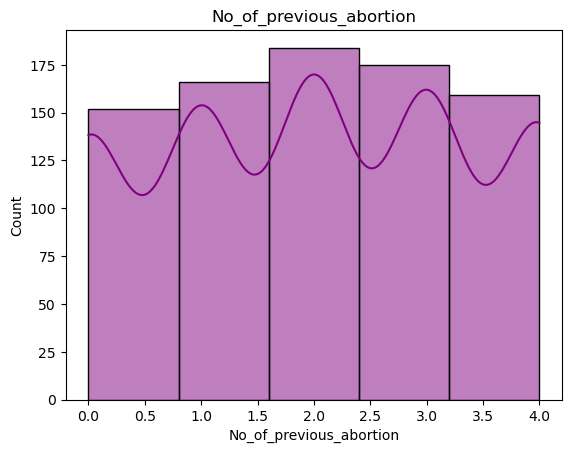

In [89]:
sns.histplot(df["No_of_previous_abortion"], bins=5, kde=True, color='purple')
plt.title("No_of_previous_abortion")
plt.show()

# White Blood cell count

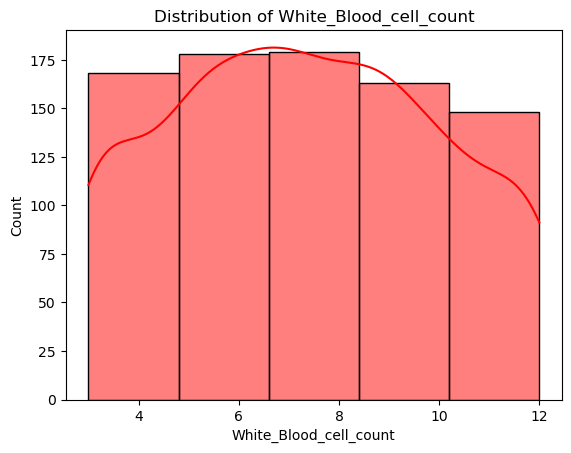

In [90]:
sns.histplot(df["White_Blood_cell_count"], bins=5, kde=True, color="red")
plt.title("Distribution of White_Blood_cell_count")
plt.show()

# Symptom 1 

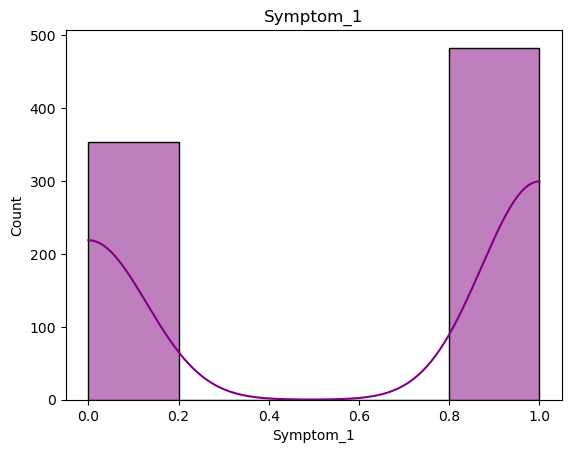

In [91]:
sns.histplot(df["Symptom_1"], bins=5, kde=True, color='purple')
plt.title("Symptom_1")
plt.show()

# Synptom 2

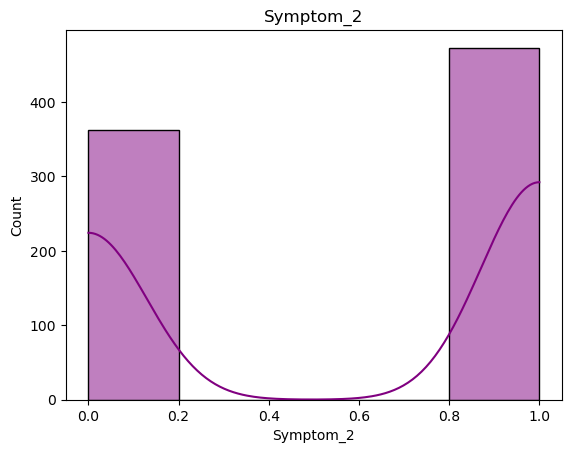

In [92]:
sns.histplot(df["Symptom_2"], bins=5, kde=True, color='purple')
plt.title("Symptom_2")
plt.show()

# Synptom 3

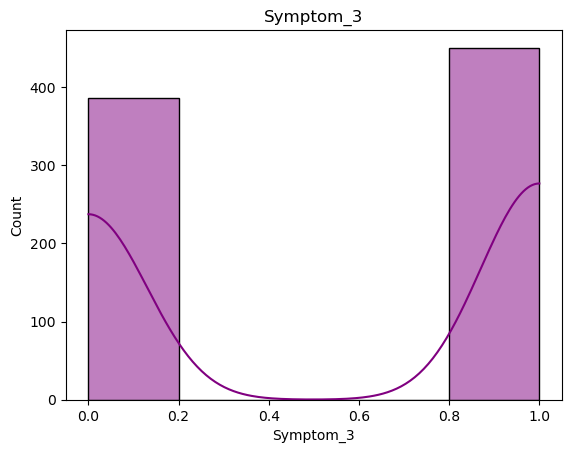

In [93]:
sns.histplot(df["Symptom_3"], bins=5, kde=True, color='purple')
plt.title("Symptom_3")
plt.show()

# Synptom 4

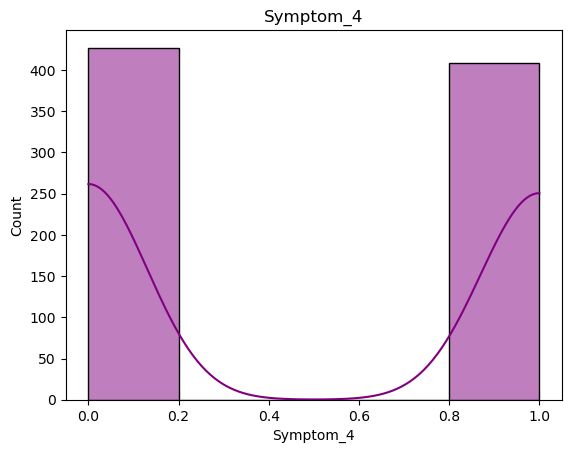

In [94]:
sns.histplot(df["Symptom_4"], bins=5, kde=True, color='purple')
plt.title("Symptom_4")
plt.show()

# Synptom 5

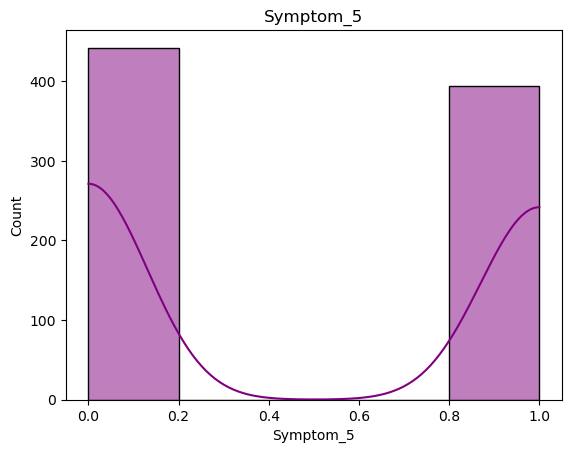

In [95]:
sns.histplot(df["Symptom_5"], bins=5, kde=True, color='purple')
plt.title("Symptom_5")
plt.show()

### Bivariate Analysis

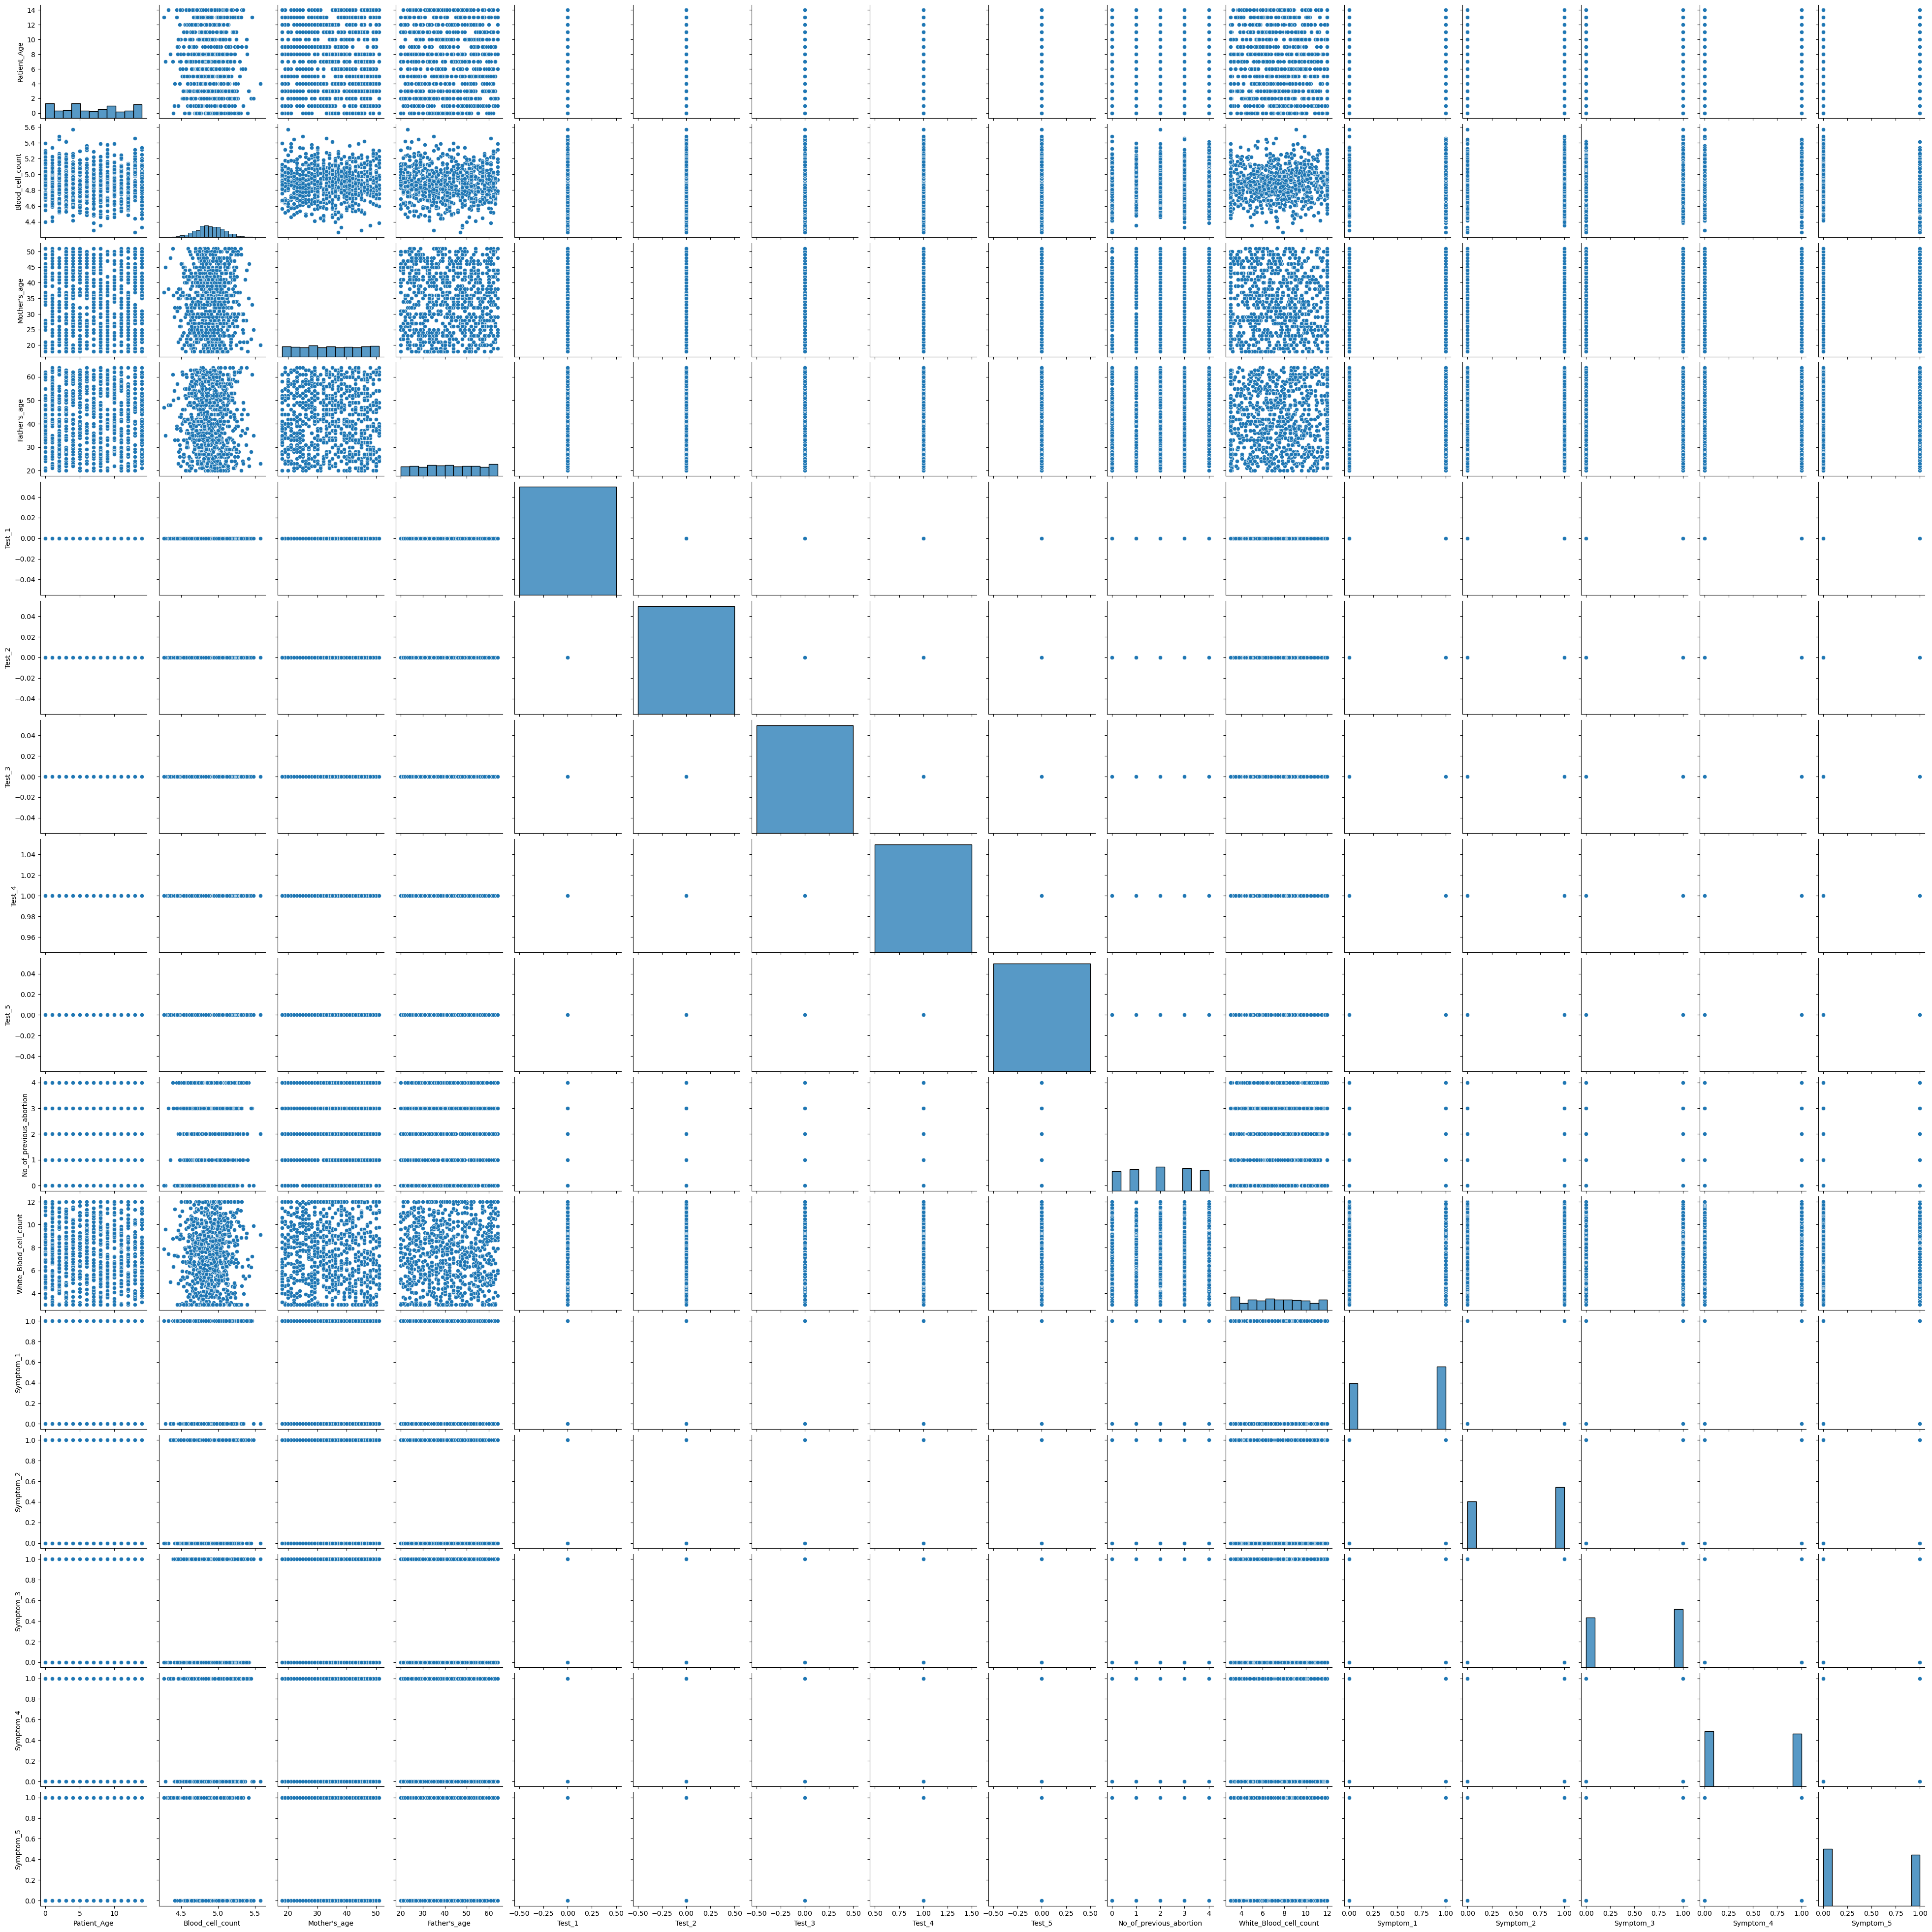

In [96]:
sns.pairplot(df)
plt.show()

### Multivaiate Analysis

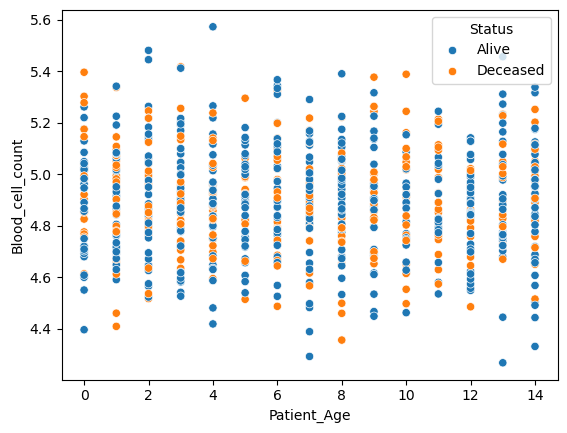

In [97]:
sns.scatterplot(x = "Patient_Age", y = "Blood_cell_count", hue = "Status", data = df)
plt.show()

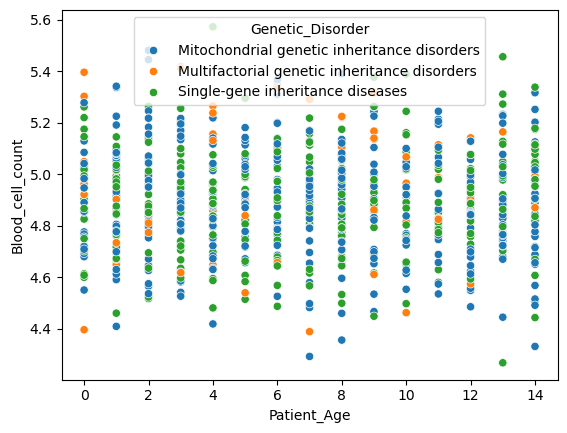

In [98]:
sns.scatterplot(x = "Patient_Age", y = "Blood_cell_count", hue = "Genetic_Disorder", data = df)
plt.show()

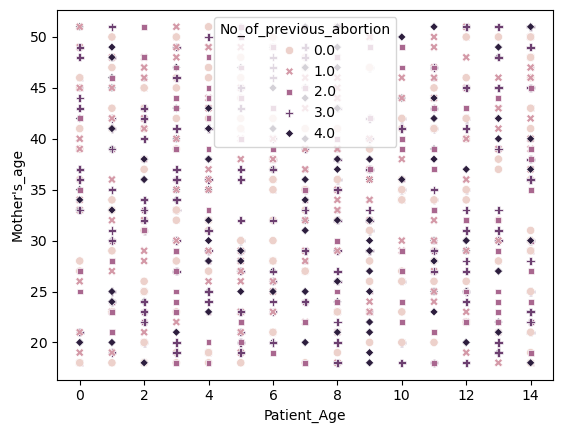

In [99]:
sns.scatterplot(x = "Patient_Age", y = "Mother's_age", hue = "No_of_previous_abortion", style="No_of_previous_abortion", data = df)
plt.show()

# Data Pre-Processing

## Encoding Categorical data

### Encoding the Independent variable(two variables)

In [100]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Genes_in_mother's_side"] = le.fit_transform(df["Genes_in_mother's_side"])
df["Inherited_from_father"] = le.fit_transform(df["Inherited_from_father"])
df["Maternal_gene"] = le.fit_transform(df["Maternal_gene"])
df["Paternal_gene"] = le.fit_transform(df["Paternal_gene"])
df["Status"] = le.fit_transform(df["Status"])
df["Respiratory_Rate"] = le.fit_transform(df["Respiratory_Rate"])
df["Heart_Rate"] = le.fit_transform(df["Heart_Rate"])
df["Parental_consent"] = le.fit_transform(df["Parental_consent"])
df["Follow_up"] = le.fit_transform(df["Follow_up"])
df["Gender"] = le.fit_transform(df["Gender"])
df["Place_of_birth"] = le.fit_transform(df["Place_of_birth"])
df["Folic_acid_details"] = le.fit_transform(df["Folic_acid_details"])
df["HO_serious_maternal_illness"] = le.fit_transform(df["HO_serious_maternal_illness"])
df["Assisted_conception_IVF_ART"] = le.fit_transform(df["Assisted_conception_IVF_ART"])
df["History_of_anomalies_in_previous_pregnancies"] = le.fit_transform(df["History_of_anomalies_in_previous_pregnancies"])
df["Birth_defects"] = le.fit_transform(df["Birth_defects"])

In [101]:
df

,Patient_Age,Genes_in_mother's_side,Inherited_from_father,Maternal_gene,Paternal_gene,Blood_cell_count,Mother's_age,Father's_age,Status,Respiratory_Rate,...,Birth_defects,White_Blood_cell_count,Blood_test_result,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Genetic_Disorder,Disorder_Subclass
0,11.0,0,0,1,0,5.209058,45.0,44.0,0,1,...,0,6.669552,slightly abnormal,1.0,1.0,1.0,0.0,1.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
1,4.0,0,1,1,1,4.752272,44.0,42.0,0,1,...,0,6.397702,abnormal,0.0,0.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes
12,1.0,1,1,1,1,5.094957,45.0,23.0,1,0,...,1,6.583277,normal,0.0,0.0,0.0,0.0,1.0,Mitochondrial genetic inheritance disorders,Mitochondrial myopathy
14,3.0,1,0,1,1,4.796649,46.0,34.0,1,0,...,1,4.942813,abnormal,0.0,1.0,1.0,1.0,0.0,Single-gene inheritance diseases,Cystic fibrosis
32,7.0,1,0,0,0,4.918639,35.0,61.0,1,0,...,0,6.842184,normal,0.0,0.0,1.0,0.0,0.0,Single-gene inheritance diseases,Tay-Sachs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5557,8.0,1,1,1,0,5.057871,18.0,38.0,0,1,...,0,6.266179,normal,0.0,1.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
5559,6.0,1,0,1,0,4.723348,49.0,62.0,0,0,...,1,4.955263,slightly abnormal,0.0,0.0,0.0,0.0,1.0,Mitochondrial genetic inheritance disorders,Mitochondrial myopathy
5561,14.0,0,1,1,0,4.835705,24.0,48.0,0,1,...,0,3.777565,normal,1.0,1.0,0.0,1.0,0.0,Single-gene inheritance diseases,Cystic fibrosis
5568,11.0,0,0,1,0,5.104406,43.0,24.0,1,0,...,0,4.847442,abnormal,1.0,1.0,0.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Mitochondrial myopathy


### Encoding the Independent variable(more than two variables)

In [104]:
x = df.drop('Status', axis=1).values

y = df['Status'].values


In [105]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(), [18, 19, 23, 24, 30, 36, 37])], remainder = 'passthrough')
x = np.array(ct.fit_transform(x))

In [106]:
x[0] 

array([0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0,
       1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0,
       11.0, 0, 0, 1, 0, 5.20905799917528, 45.0, 44.0, 1, 1, 0.0, 0.0,
       0.0, 1.0, 0.0, 0, 1, 1, 1, 1, 1, 0, 1, 0.0, 0, 6.669552178444405,
       1.0, 1.0, 1.0, 0.0, 1.0], dtype=object)

# Encoding Dependent variable

In [107]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() 
y = le.fit_transform(y)

In [108]:
y

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,

# Splitting the dataset into the Training set and Test set

In [109]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 5)

In [110]:
x_train.shape

(668, 57)

In [111]:
x_test.shape

(168, 57)

# Feature Scaling

In [112]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train[:, [26, 31, 32, 33, 51]] = sc.fit_transform(x_train[:, [26, 31, 32, 33, 51]])
x_test[:, [26, 31, 32, 33, 51]] = sc.transform(x_test[:, [26, 31, 32, 33, 51]])

In [113]:
x_train[0]

array([0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0,
       1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.22934006681198904, 1, 0, 0, 0, -0.17571294858520656,
       -0.006986363190125124, -1.3763862435424064, 1, 0, 0.0, 0.0, 0.0,
       1.0, 0.0, 0, 1, 1, 1, 1, 0, 1, 1, 1.0, 0, -0.22914860109044138,
       1.0, 1.0, 1.0, 0.0, 1.0], dtype=object)

# Model building

# SVM

In [114]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 5)
classifier.fit(x_train, y_train)

SVC(kernel='linear', random_state=5)

# Predicting the Test set result

In [115]:
y_pred = classifier.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]

# Checking the Confusion matrix

In [116]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[98  0]
 [ 0 70]]


1.0

# Random Forest

In [117]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 5)
classifier.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=5)

In [118]:
y_pred = classifier.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]

# Making the Confusion matrix

In [119]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[98  0]
 [ 0 70]]


1.0

# Decision Tree

In [120]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 5)
classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=5)

In [121]:
y_pred = classifier.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)),1))

[[0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]

# Making the Confusion Matrix

In [122]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[98  0]
 [ 0 70]]


1.0

# Performance Analysis and Model Comparison

I evaluated three models: **Support Vector Machine (SVM), Random Forest, and Decision Tree** using their confusion matrices and accuracy scores. All three models achieved perfect accuracy.

## Accuracy Comparison

In [ ]:
SVM                                          1.0 (100%)

In [ ]:
Random Forest                                1.0 (100%)

In [ ]:
Decision Tree                                1.0 (100%)

## Confusion Matrix Insights

### SVM                
                [98 0 ] 
                [0  70]

## Random Forest

                [98 0 ] 
                [0  70]

## Decision Tree

                [98 0 ] 
                [0  70]

# Key Findings

In [ ]:
1. All three models perfectly classified the dataset, achieving 100% accuracy.

2. There were no False Positives (FP) or False Negatives (FN) for any of the models.

3. The dataset appears to be easy to classify, suggesting that all models performed exceptionally well.

# Best Performing Model and Justification

### Since all models achieved a perfect score, we need to evaluate them based on other factors:

Model	               Accuracy	                    Interpretability	                    Overfitting Risk	                 Scalability
SVM	                     1.0	                          Low	                                  Low	                             Moderate
Random Forest	         1.0	                         Moderate	                              Low	                             High
Decision Tree	         1.0	                          High	                                  High	                             High

## Chosen Model: Random Forest

### Justification

In [ ]:
1. Provides a balance between accuracy and robustness by averaging multiple decision trees.

2. Reduces overfitting, unlike a single Decision Tree.

3. Scalable for larger datasets.

4. Performs well even when some features are less important.

# Recommendations for Improving Model Performance

In [ ]:
1. Cross-Validation:

    ● Implement k-fold cross-validation to ensure robustness and prevent overfitting.

2. Hyperparameter Tuning:

    ● For Random Forest, adjust parameters like n_estimators, max_depth, and min_samples_split.

    ● For SVM, fine-tune C and gamma parameters.

3. Feature Selection:

    ● Ensure relevant features are included to improve model generalization.

4. Ensemble Methods:

    ● Consider using boosting techniques (e.g., XGBoost, AdaBoost) to enhance performance.

# Limitations of the Dataset or Models

1. Dataset Imbalance:

   ● The confusion matrices indicate a balanced dataset; however, this perfect accuracy may be due to an easy classification problem.

   ● Testing on a more challenging dataset or applying synthetic noise would provide a clearer evaluation.

2. Risk (Decision Tree):

   ● A single Decision Tree may overfit, especially if the dataset is large or noisy.

3. Lack of Diversity in Evaluation Metrics:

   ● Relying solely on accuracy is not enough. Metrics like Precision, Recall, and F1-Score should be considered for a more thorough analysis.

4. Scalability Concerns:

   ● While Random Forest is robust, its performance can degrade with very large datasets if not tuned properly.

# Conclusion

In [ ]:
1. Random Forest is the most reliable model considering accuracy, robustness against overfitting, and scalability.

2. Improvements could include cross-validation, hyperparameter tuning, and testing on more complex datasets.

3. It is essential to consider precision, recall, and F1-score for a more comprehensive evaluation.